In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [64]:
X = dataset.iloc[:, :-1].values
y = dataset.loc[:, 'pass'].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
X_train.shape, X_test.shape

((16, 1), (4, 1))

In [67]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [68]:
#6, 4시간 공부했을때 합격?
logistic.predict([[6], [4]])

array([1, 0])

In [69]:
logistic.predict_proba([[6]])

array([[0.141483, 0.858517]])

In [70]:
logistic.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [71]:
y_pred = logistic.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [72]:
y_test

array([1, 0, 1, 0])

In [73]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [74]:
logistic.score(X_test, y_test), 3/4

(0.75, 0.75)

In [75]:
def model_logistic():
    import pandas as pd
    dataset = pd.read_csv('data/LogisticRegressionData.csv')
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    from sklearn.linear_model import LogisticRegression
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    return logistic

In [76]:
model = model_logistic()
hour = 3.5
model.predict([[hour]]), model.predict_proba([[hour]])

(array([0]), array([[0.74822448, 0.25177552]]))

In [77]:
def predict(hour):
    model = model_logistic()
    pred = model.predict([[hour]])
    pred_proba = model.predict_proba([[hour]])
    pass_proba = pred_proba[0][1]
    fail_proba = pred_proba[0][0]

    if pred[0]==0:
        result = '불합격'
    else:
        result = '합격'
    print(f'{hour}시간 공부한 경우 {result}입니다.')
    print(f'합격:{pass_proba*100:.2f}%, 불합격:{fail_proba*100:.2f}')


predict(4.5)

4.5시간 공부한 경우 합격입니다.
합격:51.69%, 불합격:48.31


In [78]:
import numpy as np
max = np.ceil(np.max(X_train))
min =np.floor(np.min(X_train))
x_range = np.arange(min, max, 0.1)
x_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [79]:
#p = 1/(1 + e^-y) y=mx+b
y = logistic.coef_ * x_range + logistic.intercept_
P = 1 / (1 + np.exp(-y))
cols=P.shape[1]
p = P.reshape(P.shape[1])
p

array([0.00583381, 0.00654462, 0.00734139, 0.00823436, 0.00923494,
       0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
       0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
       0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
       0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
       0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
       0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
       0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
       0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
       0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
       0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
       0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
       0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
       0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
       0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840

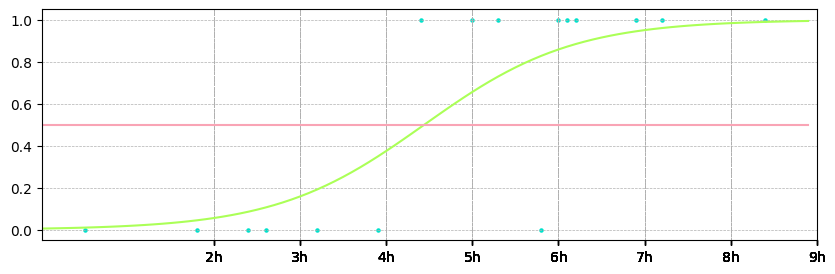

In [80]:
plt.figure(figsize=(10, 3))
plt.scatter(X_train, y_train, color="#00E2CC", s=5)
plt.plot(x_range, p, color="#ABFF57")
plt.plot(x_range, np.full(len(x_range), 0.5), color="#F9A4B5")
plt.grid(True, ls='--', lw=0.5)
xticks = [int(x) for x in x_range+2]
plt.xticks(xticks, [f'{x}h' for x in xticks])
plt.xlim(0, max)
plt.show()

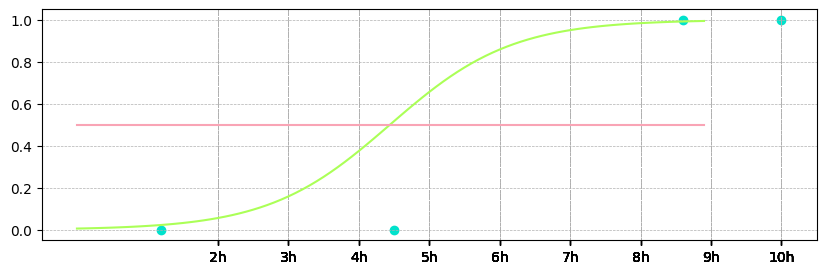

In [81]:
plt.figure(figsize=(10, 3))
plt.scatter(X_test, y_test, color="#00E2CC")
plt.plot(x_range, p, color="#ABFF57")
plt.plot(x_range, np.full(len(x_range), 0.5), color="#F9A4B5")
plt.grid(True, ls='--', lw=0.5)
xticks = [int(x) for x in x_range+2]
plt.xticks(xticks, [f'{x}h' for x in xticks])
plt.show()

In [82]:
import pandas as pd 
import matplotlib.pyplot as plt

In [83]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [84]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X.shape, y.shape

((20, 1), (20,))

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [87]:
import numpy as np
for hour in np.arange(4.0, 5.0, 0.1):
    pred=logistic.predict([[hour]])
    print(f'{hour:.1f}:{pred[0]}')


4.0:0
4.1:0
4.2:0
4.3:0
4.4:0
4.5:1
4.6:1
4.7:1
4.8:1
4.9:1


In [88]:
df = pd.read_csv('data/로지스틱회귀.csv')
df

,이름,공부시간
0,홍길동,4.2
1,강감찬,5.1
2,이순신,4.5
3,성춘향,7.2
4,이몽룡,2.8


In [89]:
X = df[['hour']].values
X.shape

KeyError: "None of [Index(['hour'], dtype='object')] are in the [columns]"

In [ ]:
y_pred = logistic.predict(X)
y_pred


array([0, 1, 1, 1])

In [ ]:
df['pass'] = y_pred
df['합격여부'] = df['pass'].apply(lambda x:'합격' if x==1 else'불합격')
df

,name,hour,pass,합격여부
0,홍길동,4.2,0,불합격
1,강감찬,5.1,1,합격
2,이순신,4.5,1,합격
3,성춘향,7.2,1,합격


In [ ]:
logistic.score(X_train, y_train)

0.875

In [ ]:
import numpy as np
x_range = np.arange(0, 10.1, 0.1)
x_range

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
#y = mb + b
y = logistic.coef_ * x_range + logistic.intercept_
#p = 1 / (1 + e^-y)
p = 1 / (1 + np.exp(-y))
y_range=p.reshape(p.shape[1])
y_range.shape

(101,)

In [ ]:
# plt.figure(figsize=(5, 3))
# plt.scatter(X_train, y_train, color="#F9A4B5", label='real')
# plt.plot(x_range, y_range, color="#ABFF57", label='predict')
# plt.plot(x_range, np.full(len(x_range), 0.5), color="#00E2CC")
# plt.yticks(np.arange(0, 1.1, 0.5))
# plt.xticks(np.arange(0, 10.1, 1))
# plt.legend()
# plt.show()

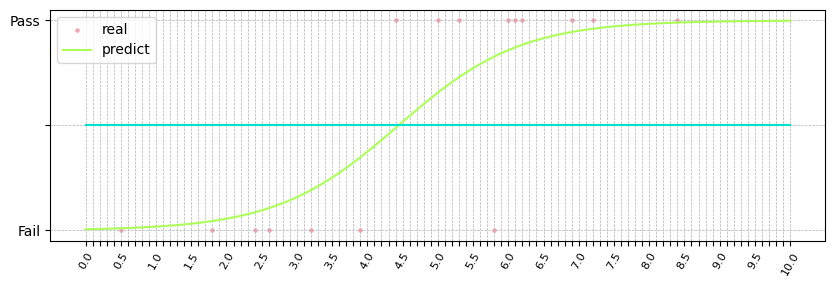

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(X_train, y_train, label='real', s=5, color="#F9A4B5")
plt.plot(x_range, y_range, color="#ABFF57", label='predict')
plt.plot(x_range, np.full(len(x_range), 0.5), color="#00E2CC")
xticks = [x for x in np.arange(0, 10.1, 0.1)]
xlabel = [x if x%0.5==0 else '' for x in xticks ]
plt.xticks(xticks, labels=xlabel, rotation=60, size=8)
plt.yticks([0, 0.5, 1], ['Fail','', 'Pass'])
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.show()

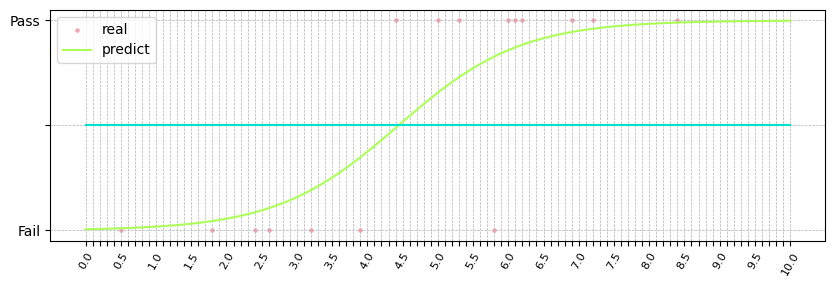

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(X_train, y_train, label='real', s=5, color="#F9A4B5")
plt.plot(x_range, y_range, color="#ABFF57", label='predict')
plt.plot(x_range, np.full(len(x_range), 0.5), color="#00E2CC")
xticks = [x for x in np.arange(0, 10.1, 0.1)]
xlabel = [x if x%0.5==0 else '' for x in xticks ]
plt.xticks(xticks, labels=xlabel, rotation=60, size=8)
plt.yticks([0, 0.5, 1], ['Fail','', 'Pass'])
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.show()

In [ ]:
y_pred = logistic.predict(X_test)
y_pred, y_test

(array([1, 0, 1, 1]), array([1, 0, 1, 0]))

In [ ]:
y_pred = logistic.predict(X_train)
y_pred, y_train

(array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]))

In [ ]:
y_pred = logistic.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
cm

array([[6, 1],
       [1, 8]])

In [ ]:
y_pred = logistic.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]])

In [ ]:
true=cm[0,0]+cm[1,1]
print(f'정답수:{true}')

정답수:3


In [ ]:
y_pred = logistic.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[6, 1],
       [1, 8]])

In [ ]:
true = cm[0][0] + cm[1][1]
print(f'정답수:{true}')

정답수:14


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y_pred = logistic.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(y, y_pred)
cm

array([[ 7,  2],
       [ 1, 10]])

In [ ]:
true = cm[0][0] + cm[1][1]
print(f'정답수:{true}')

정답수:17


In [ ]:
logistic.score(X, y), 17/20

(0.85, 0.85)

In [ ]:
df = dataset.copy()
df['predict']=y_pred
filt = df['pass'] != df['predict']
df[filt]

,hour,pass,predict
7,4.4,1,0
8,4.5,0,1
11,5.8,0,1


In [ ]:
import pandas as pd
df = pd.read_csv('data/로지스틱회귀.csv')
df

,이름,공부시간
0,홍길동,4.2
1,강감찬,5.1
2,이순신,4.5
3,성춘향,7.2
4,이몽룡,2.8


In [93]:
X = df.loc[:, '공부시간'].values
X2 =X.reshape(len(X), 1)
y_pred = logistic.predict(X2)
df['pass'] = y_pred
df['합격예상'] = df['pass'].apply(lambda x:'합격' if x==1 else '불합격')
y_pred_proba = logistic.predict_proba(X2)
y_pred_pass = [f'{y[1]*100:.2f}%' for y in y_pred_proba]
df['예상합격율'] = y_pred_pass
df.drop(columns='pass', inplace=True)
df

,이름,공부시간,합격예상,예상합격율
0,홍길동,4.2,불합격,43.06%
1,강감찬,5.1,합격,68.18%
2,이순신,4.5,합격,51.69%
3,성춘향,7.2,합격,96.05%
4,이몽룡,2.8,불합격,13.02%


In [91]:
y_pred_proba = logistic.predict_proba(X2)
y_pred_pass = [f'{y[1]*100:.2f}%' for y in y_pred_proba]
y_pred_pass

['43.06%', '68.18%', '51.69%', '96.05%', '13.02%']